<a href="https://colab.research.google.com/github/diogenesjusto/FIAP-On-Line-Graduation/blob/main/code/1_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

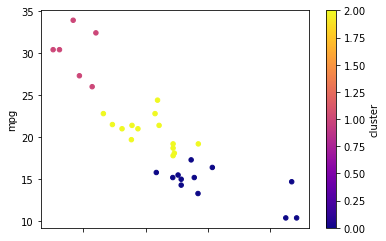

In [1]:
# carrega as bibliotecas pandas e Kmeans
import pandas as pd
from sklearn.cluster import KMeans

# carrega o dataset 
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/%20mtcars.csv")

# executa o algoritmo K-Means com 3 clusters, utilizando as variáveis mpg (milhas por galão) e wt (peso)
k = KMeans(n_clusters=3, random_state=0).fit(df[['mpg','wt']])

# adiciona o número do cluster (entre 0, 1 e 2) como uma nova coluna no dataframe
df['cluster'] = k.labels_

# visualização gráfico de dispersão das duas variáveis escolhidas, identificando no gráfico cada objeto o cluster ao qual pertence
df.plot.scatter(x='wt', y='mpg', c='cluster', colormap='plasma')

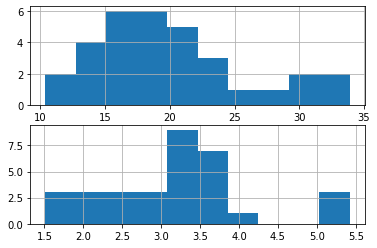

In [2]:
import matplotlib.pyplot as plt
# definindo uma janela lado a lado para geração dos histogramas das 2 variáveis
fig, axes = plt.subplots(2, 1)
 
# Padronização de variáveis
df['mpg'].hist(ax=axes[0])
df['wt'].hist(ax=axes[1])


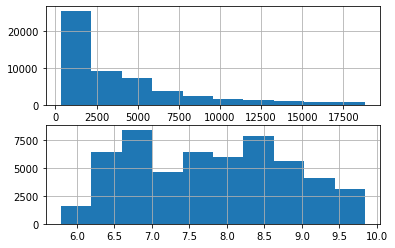

In [3]:
# Método de ajuste de escala Log-Lin

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# definindo uma janela lado a lado para geração dos histogramas das 2 variáveis
fig, axes = plt.subplots(2, 1)
 
# carrega dados
dfd = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/diamonds.csv")
# constrói histograma de price
dfd['price'].hist(ax=axes[0])
 
# aplica uma transformação logarítmica na variável price
dfd['price_log'] = np.log(dfd['price'])
dfd['price_log'].hist(ax=axes[1])

In [17]:
# Métodos estatísticos de ajuste de escala
# Retornando a base mtcars

# M1 - Z-Pdrão
from scipy.stats import zscore
df['mpg_z'], df['wt_z'] = (df['mpg']-df['mpg'].mean() )/ df['mpg'].std(), zscore(df['wt']) 

# M2 - Range 0 a 1, -1 a 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df['mpg_r01'], df['wt_r01'] = scaler.fit_transform(df[['mpg']]), scaler.fit_transform(df[['wt']]) 

# M3 - Máxima Amplitude
df['mpg_ma'], df['wt_ma'] = df['mpg']/df['mpg'].max(), df['wt']/df['wt'].max()

# M4 - Média 1
df['mpg_m1'], df['wt_m1'] = df['mpg']/df['mpg'].mean(), df['wt']/df['wt'].mean()

In [30]:
# Visualização das novas variáveis transformadas
df.loc[:,'mpg_z':'wt_m1'].head()

,mpg_z,wt_z,mpg_r01,wt_r01,mpg_ma,wt_ma,mpg_m1,wt_m1
0,0.150885,-0.620167,0.451064,0.283048,0.619469,0.483038,1.045264,0.814360
1,0.150885,-0.355382,0.451064,0.348249,0.619469,0.530052,1.045264,0.893620
2,0.449543,-0.931678,0.527660,0.206341,0.672566,0.427729,1.134858,0.721113
3,0.217253,-0.002336,0.468085,0.435183,0.631268,0.592736,1.065173,0.999301
4,-0.230735,0.231297,0.353191,0.492713,0.551622,0.634218,0.930782,1.069236


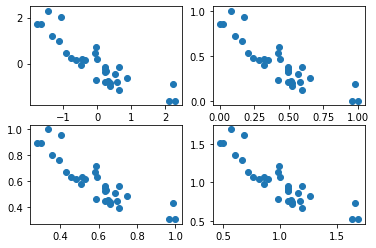

In [35]:
# Geração dos gráficos de dispersão com as novas variáveis
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.scatter(df['wt_z'], df['mpg_z'])
ax2.scatter(df['wt_r01'], df['mpg_r01'])
ax3.scatter(df['wt_ma'], df['mpg_ma'])
ax4.scatter(df['wt_m1'], df['mpg_m1'])
